# Sentiment Analysis

## Sentiment of Poems

In [48]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
allen,I saw the best minds of my generation destroye...,Allen Ginsberg
axentioi,"For what you might be last with,\nWe might not...",Axentioi Alexandru
christina,"Hurt no living thing: \nLadybird, nor butterfl...",Christina Georgina Rossetti
george,"When we two parted \n In silence and tears, \...",George Gordon Byron
iff,loose leaves fall\n from winter gray\n ...,Iff Ur Abs
judith,"The eyeless labourer in the night,\nthe selfle...",Judith Wright
max,Let me do my work each day; and if the darkene...,Max Ehrmann
nuno,"I'm walking the dog, it's raining \nhe sniffs ...",Nuno Cardoso
paul,"We wear the mask that grins and lies,\nIt hide...",Paul Laurence Dunbar
sammeh,Who the fuck did you call when you were coked ...,Sammeh Love


In [49]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
allen,I saw the best minds of my generation destroye...,Allen Ginsberg,-0.000709,0.491019
axentioi,"For what you might be last with,\nWe might not...",Axentioi Alexandru,-0.000962,0.514850
christina,"Hurt no living thing: \nLadybird, nor butterfl...",Christina Georgina Rossetti,0.237500,0.637500
george,"When we two parted \n In silence and tears, \...",George Gordon Byron,-0.116061,0.454242
iff,loose leaves fall\n from winter gray\n ...,Iff Ur Abs,0.030769,0.442308
judith,"The eyeless labourer in the night,\nthe selfle...",Judith Wright,0.053846,0.505128
max,Let me do my work each day; and if the darkene...,Max Ehrmann,0.225000,0.518137
nuno,"I'm walking the dog, it's raining \nhe sniffs ...",Nuno Cardoso,-0.074359,0.505128
paul,"We wear the mask that grins and lies,\nIt hide...",Paul Laurence Dunbar,0.226786,0.385714
sammeh,Who the fuck did you call when you were coked ...,Sammeh Love,-0.038141,0.577885


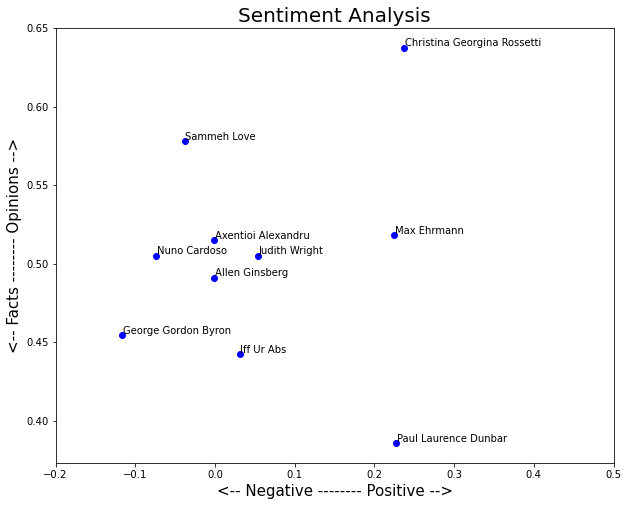

In [50]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, poet in enumerate(data.index):
    x = data.polarity.loc[poet]
    y = data.subjectivity.loc[poet]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-0.2, .5) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Poems Over Time

In [51]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [52]:
data

,transcript,full_name,polarity,subjectivity
allen,I saw the best minds of my generation destroye...,Allen Ginsberg,-0.000709,0.491019
axentioi,"For what you might be last with,\nWe might not...",Axentioi Alexandru,-0.000962,0.514850
christina,"Hurt no living thing: \nLadybird, nor butterfl...",Christina Georgina Rossetti,0.237500,0.637500
george,"When we two parted \n In silence and tears, \...",George Gordon Byron,-0.116061,0.454242
iff,loose leaves fall\n from winter gray\n ...,Iff Ur Abs,0.030769,0.442308
judith,"The eyeless labourer in the night,\nthe selfle...",Judith Wright,0.053846,0.505128
max,Let me do my work each day; and if the darkene...,Max Ehrmann,0.225000,0.518137
nuno,"I'm walking the dog, it's raining \nhe sniffs ...",Nuno Cardoso,-0.074359,0.505128
paul,"We wear the mask that grins and lies,\nIt hide...",Paul Laurence Dunbar,0.226786,0.385714
sammeh,Who the fuck did you call when you were coked ...,Sammeh Love,-0.038141,0.577885


In [53]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['I saw the best minds of my generation destroyed by \n\xa0 \xa0 \xa0 \xa0 madness, starving hysterical naked,\ndragging themselves through the negro streets at dawn \n\xa0 \xa0 \xa0 \xa0 looking for an angry fix, \nangelheaded hipsters burning for the ancient heavenly \n\xa0 \xa0 \xa0 \xa0 connection to the starry dynamo in the machin-\n\xa0 \xa0 \xa0 \xa0 ery of night, \nwho poverty and tatters and hollow-eyed and high sat \n\xa0 \xa0 \xa0 \xa0 up smoking in the supernatural darkness of \n\xa0 \xa0 \xa0 \xa0 cold-water flats floating across the tops of cities \n\xa0 \xa0 \xa0 \xa0 contemplating jazz, \nwho bared their brains to Heaven under the El and \n\xa0 \xa0 \xa0 \xa0 saw Mohammedan angels staggering on tene-\n\xa0 \xa0 \xa0 \xa0 ment roofs illuminated, \nwho passed through universities with radiant cool eyes \n\xa0 \xa0 \xa0 \xa0 hallucinating Arkansas and Blake-light tragedy \n\xa0 \xa0 \xa0 \xa0 among the scholars of war, \nwho were expelled from the academies for crazy & \n

In [54]:
len(list_pieces)

10

In [55]:
len(list_pieces[0])

10

In [56]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.03311942959001783,
  -0.031357694592988726,
  0.09333333333333334,
  0.048544973544973544,
  0.02898715041572183,
  -0.05925925925925927,
  -0.06424603174603176,
  -0.009483557491157688,
  -0.06774976157616648,
  0.07166666666666667],
 [0.0,
  0.3,
  0.30000000000000004,
  -0.024999999999999994,
  -0.05,
  0.0,
  -0.5,
  -0.15000000000000002,
  0.7,
  -0.4],
 [0.0, 0.0, -0.4, 0.7, 0.4, 0.0, 0.0, 0.0, 0.0, 0.25],
 [-0.16666666666666666,
  -0.40499999999999997,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.03333333333333333,
  -0.4,
  -0.05,
  0.25],
 [-0.07692307692307693, 0.4, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0],
 [-0.2, 0.0, 0.4, 0.0, 0.0, 0.4, 0.35, -0.5, 0.125, -0.175],
 [0.0,
  0.19166666666666668,
  0.16666666666666666,
  -0.125,
  0.1875,
  0.0,
  0.20000000000000004,
  0.4,
  0.0,
  0.37499999999999994],
 [0.0,
  -0.2,
  0.09999999999999999,
  -0.2,
  0.0,
  0.0,
  -0.16666666666666666,
  -0.3,
  0.0,
  -0.2],
 [0.0, 0.0, 0.3, 0.0, 0.0, 0.55, 0.0, -0.05, 0.0, 0.25],
 [-0.4,
  -0.4,


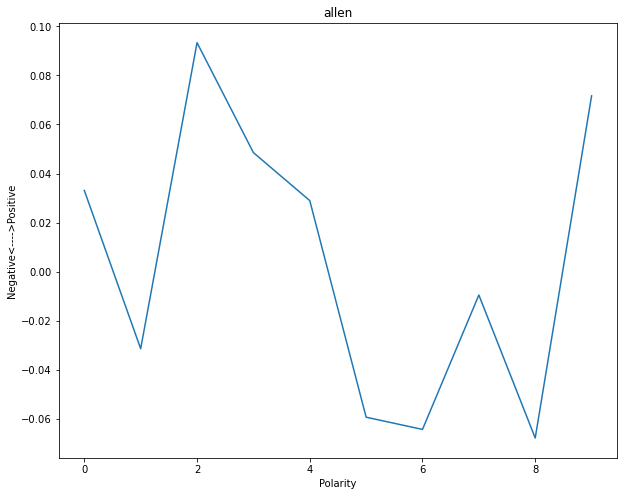

In [57]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.xlabel('Polarity')
plt.ylabel('Negative<---->Positive')
plt.show()

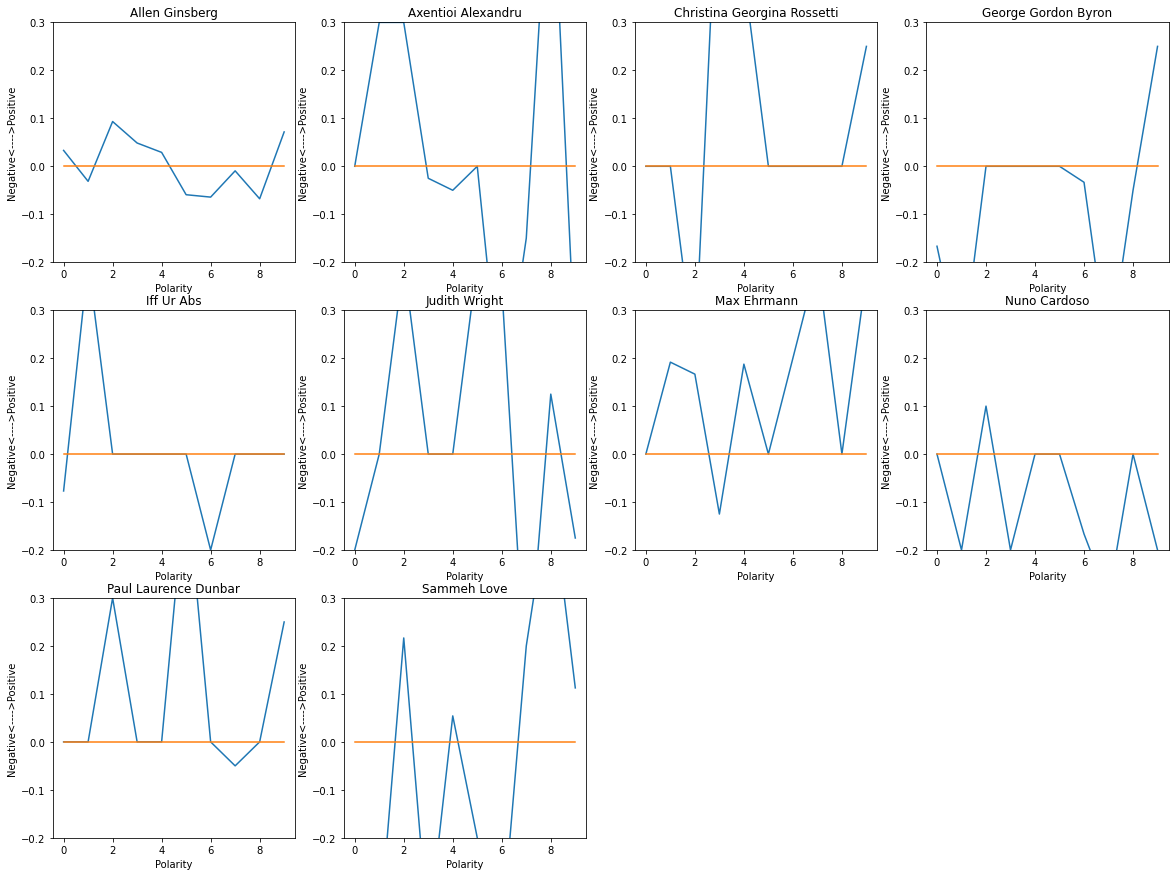

In [58]:
plt.rcParams['figure.figsize'] = [20, 15]

for index, poet in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.xlabel('Polarity')
    plt.ylabel('Negative<---->Positive')
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

## Additional Exercises

1. Modify the number of sections the poetry is split into and see how the charts over time change.

Splitting the poems into 8 parts

In [59]:
import numpy as np
import math

def split_text(text, n=8):
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [60]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["I saw the best minds of my generation destroyed by \n\xa0 \xa0 \xa0 \xa0 madness, starving hysterical naked,\ndragging themselves through the negro streets at dawn \n\xa0 \xa0 \xa0 \xa0 looking for an angry fix, \nangelheaded hipsters burning for the ancient heavenly \n\xa0 \xa0 \xa0 \xa0 connection to the starry dynamo in the machin-\n\xa0 \xa0 \xa0 \xa0 ery of night, \nwho poverty and tatters and hollow-eyed and high sat \n\xa0 \xa0 \xa0 \xa0 up smoking in the supernatural darkness of \n\xa0 \xa0 \xa0 \xa0 cold-water flats floating across the tops of cities \n\xa0 \xa0 \xa0 \xa0 contemplating jazz, \nwho bared their brains to Heaven under the El and \n\xa0 \xa0 \xa0 \xa0 saw Mohammedan angels staggering on tene-\n\xa0 \xa0 \xa0 \xa0 ment roofs illuminated, \nwho passed through universities with radiant cool eyes \n\xa0 \xa0 \xa0 \xa0 hallucinating Arkansas and Blake-light tragedy \n\xa0 \xa0 \xa0 \xa0 among the scholars of war, \nwho were expelled from the academies for crazy & \n

In [61]:
len(list_pieces)

10

In [62]:
len(list_pieces[0])

8

In [63]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.013296602387511474,
  0.06306818181818181,
  0.028559027777777767,
  0.07810111699000588,
  -0.05525793650793652,
  -0.009814831637596909,
  -0.09724822658333575,
  0.042083333333333334],
 [0.0,
  0.30000000000000004,
  -0.28125,
  0.07500000000000001,
  0.0,
  -0.5,
  0.1333333333333333,
  -0.4],
 [0.0, -0.4, 0.0, 0.4, 0.0, 0.0, 0.0, 0.25],
 [-0.18833333333333332, -0.6, -0.4, 0.0, 0.0, -0.125, -0.05, 0.25],
 [-0.07692307692307693, 0.2, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0],
 [-0.2,
  0.13333333333333333,
  0.0,
  0.0,
  0.4,
  0.35,
  -0.08333333333333333,
  -0.175],
 [-0.125,
  0.275,
  -0.012499999999999997,
  0.1875,
  0.0,
  0.20000000000000004,
  0.4,
  0.37499999999999994],
 [-0.2, -0.1, 0.033333333333333326, 0.0, -0.05555555555555555, 0.0, 0.0, -0.2],
 [0.0, 0.0, 0.3, 0.35, 0.55, 0.0, -0.05, 0.25],
 [-0.4000000000000001,
  0.21666666666666667,
  -0.3,
  -0.1638888888888889,
  -0.19999999999999998,
  -0.44999999999999996,
  0.5333333333333333,
  0.29000000000000004]]

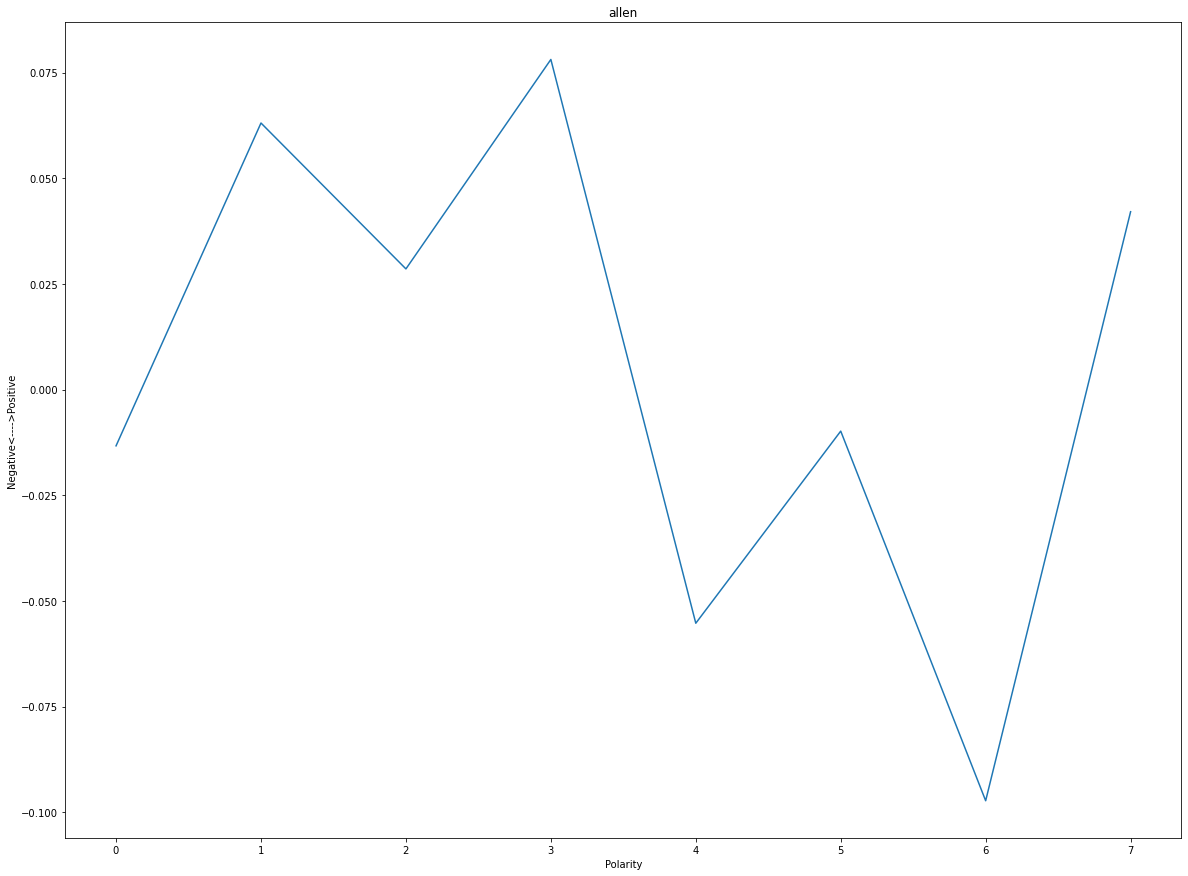

In [64]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.xlabel('Polarity')
plt.ylabel('Negative<---->Positive')
plt.show()

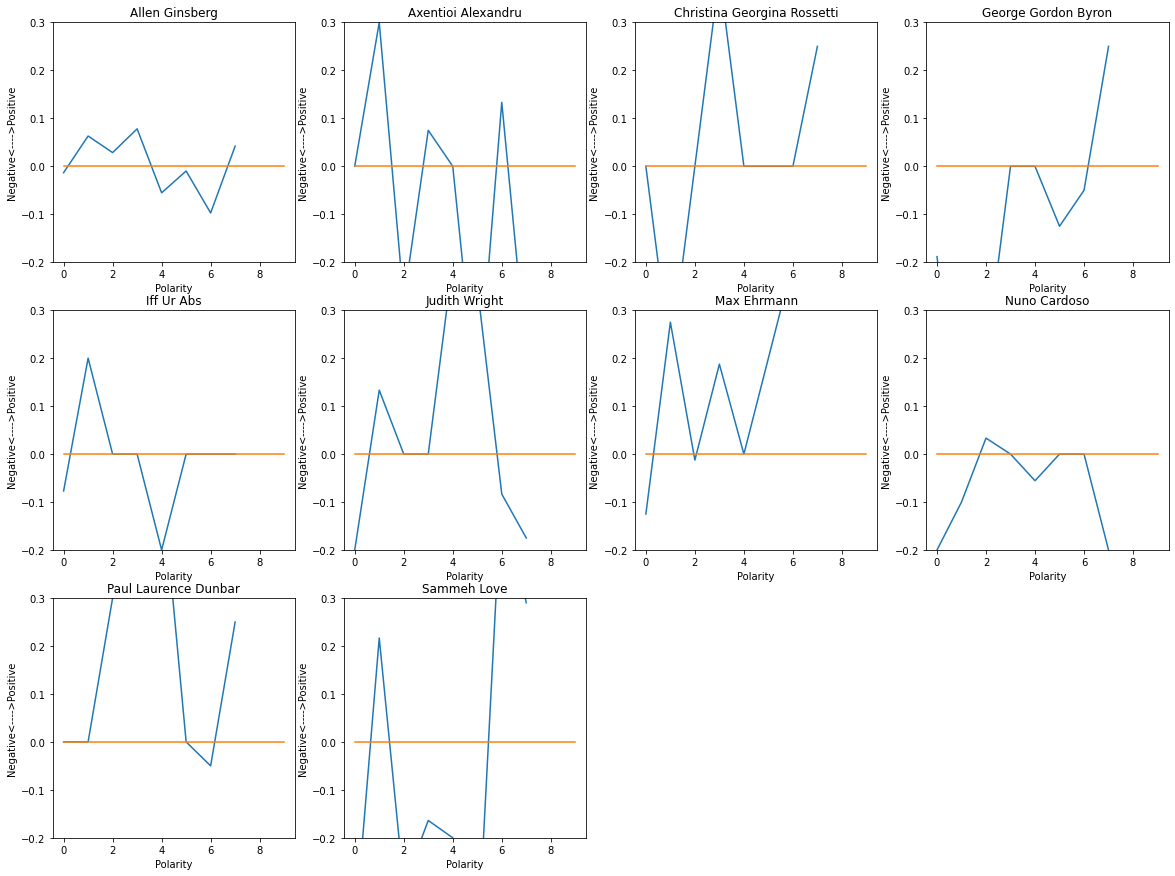

In [65]:
plt.rcParams['figure.figsize'] = [20, 15]

for index, poet in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.xlabel('Polarity')
    plt.ylabel('Negative<---->Positive')
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Splitting the poems into 20 parts

In [66]:
import numpy as np
import math

def split_text(text, n=20):
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [67]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['I saw the best minds of my generation destroyed by \n\xa0 \xa0 \xa0 \xa0 madness, starving hysterical naked,\ndragging themselves through the negro streets at dawn \n\xa0 \xa0 \xa0 \xa0 looking for an angry fix, \nangelheaded hipsters burning for the ancient heavenly \n\xa0 \xa0 \xa0 \xa0 connection to the starry dynamo in the machin-\n\xa0 \xa0 \xa0 \xa0 ery of night, \nwho poverty and tatters and hollow-eyed and high sat \n\xa0 \xa0 \xa0 \xa0 up smoking in the supernatural darkness of \n\xa0 \xa0 \xa0 \xa0 cold-water flats floating across the tops of cities \n\xa0 \xa0 \xa0 \xa0 contemplating jazz, \nwho bared their brains to Heaven under the El and \n\xa0 \xa0 \xa0 \xa0 saw Mohammedan angels staggering on tene-\n\xa0 \xa0 \xa0 \xa0 ment roofs illuminated, \nwho passed through universities with radiant cool eyes \n\xa0 \xa0 \xa0 \xa0 hallucinating Arkansas and Blake-light tragedy \n\xa0 \xa0 \xa0 \xa0 among the scholars of war, \nwho were expelled from the academies for crazy & \n

In [68]:
len(list_pieces)

10

In [69]:
len(list_pieces[0])

20

In [70]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.05291666666666667,
  0.1095959595959596,
  0.00987654320987652,
  -0.07774621212121212,
  0.1173611111111111,
  0.08202614379084967,
  0.016049382716049373,
  0.07291666666666667,
  0.0773809523809524,
  0.009629629629629632,
  -0.09206349206349208,
  -0.014814814814814812,
  -0.01937134502923977,
  -0.11753472222222223,
  0.11550564236111113,
  -0.16220389229910714,
  -0.10207574543512044,
  0.09371843804253473,
  0.07857142857142856,
  0.03928571428571429],
 [0.0,
  0.0,
  0.3,
  0.3,
  0.30000000000000004,
  0.0,
  -0.25,
  0.2,
  -0.05,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.5,
  0.0,
  -0.15000000000000002,
  0.7,
  0.0,
  0.0,
  -0.4],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25],
 [0.0,
  -0.16666666666666666,
  -0.47,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.05,
  -0.4,
  0.0,
  0.0,
  -0.05,
  0.0,
  0.0],
 [-0.07692307692307693,
  0.0,
  0.0,
  0.0,

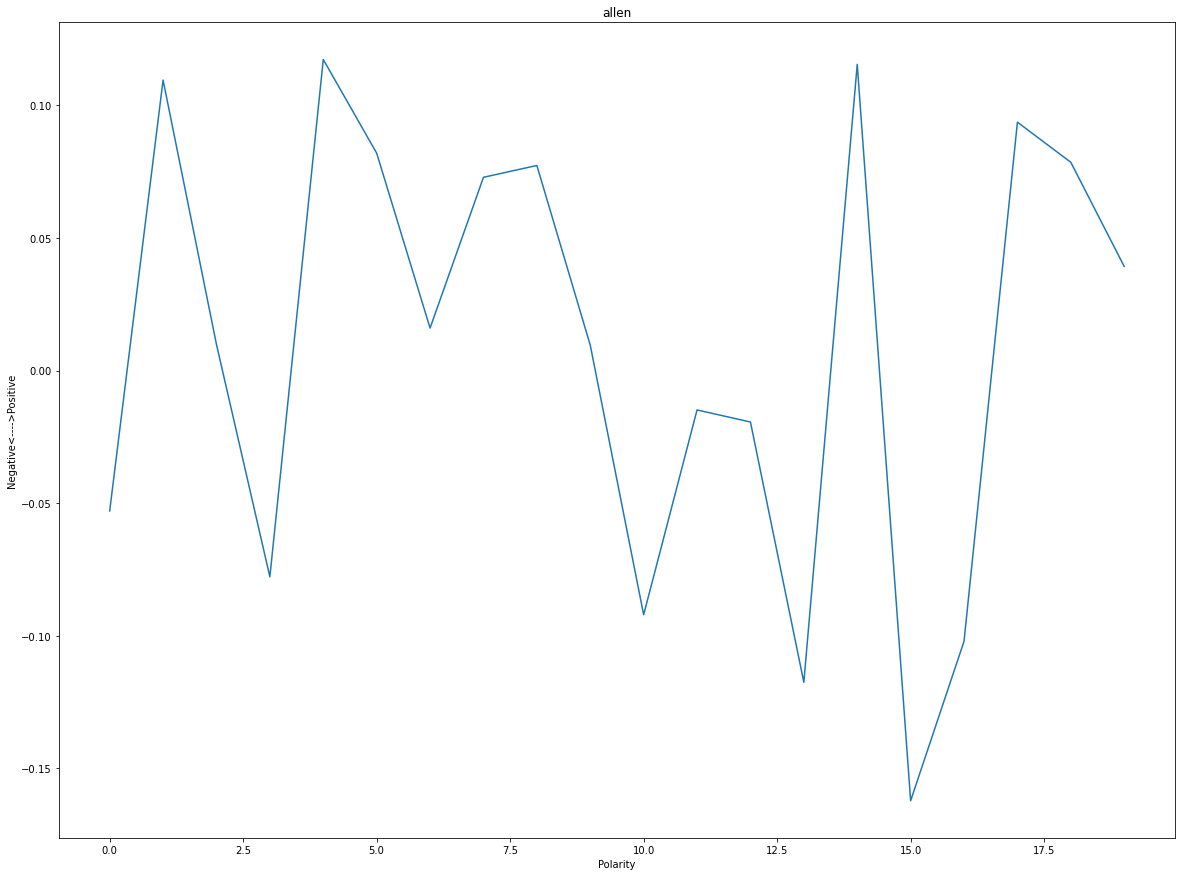

In [71]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.xlabel('Polarity')
plt.ylabel('Negative<---->Positive')
plt.show()

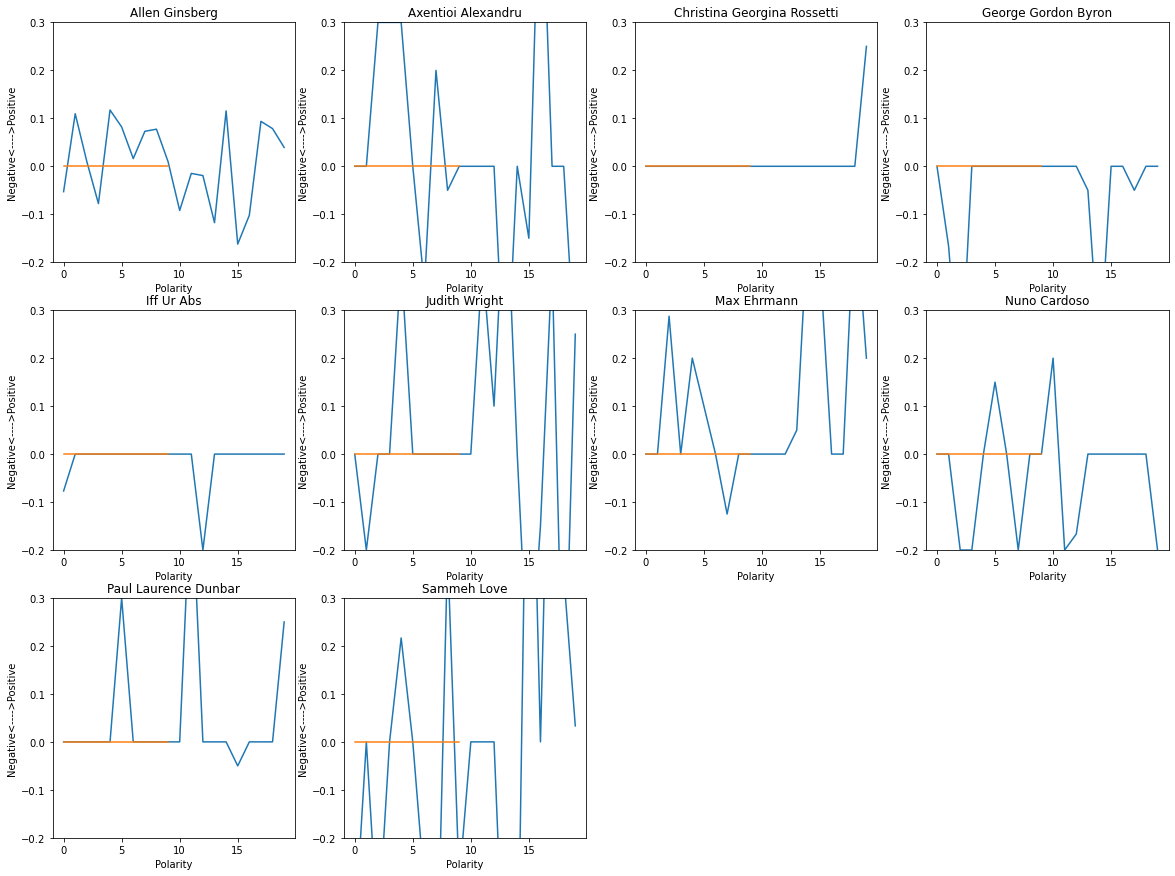

In [72]:
plt.rcParams['figure.figsize'] = [20, 15]

for index, poet in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.xlabel('Polarity')
    plt.ylabel('Negative<---->Positive')
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()